# House Sales Analysis in NorthWestern county

## 1. Business Understanding

### a) Introduction

House sales began in 1890s in the United States and since then its been growing all over the world and agencies started to form to enhance and ease the house selling process.Last year the revenue was estimated to be $4.25M with prospects of growth as time goes by. House sales are mainly influenced by the number of bedrooms, bathrooms, the year built, square footage and whether renovations are done or not among other factors.

In this case the Northwest agencies aim to address the need of providing homeowners with accurate and actionable advice on how various house features can potentially increase the estimated value of their properties and by what amount. By understanding the relationship between various house factors and house prices, the agencies can be able to guide homeowners in making informed decisions, which will ultimately lead to maximization of return on their investment which will enable them sell their homes at optimal prices.

### b) Problem statement

The real estate industry faces the challenge of providing homeowners with reliable information about how various home renovation factors impact the estimated value of their homes. Our project addresses this problem by utilizing data analysis and regression modeling to identify key factors that affect house prices in a northwestern county. By understanding these factors, we can provide recommendations and insights to stakeholders on how to effectively advise homeowners on renovations that can potentially increase the value of their properties.

### c) Main Objective

The main objective of this project is to develop a predictive model that estimates house prices based on various features such as the number of bedrooms and bathrooms, square footage, and year built. By building a regression model, we aim to accurately predict house prices and provide stakeholders with valuable insights into the factors driving price fluctuations.

### d) Metric of success

The success of our project will be evaluated based on the model's performance in predicting house prices. We will use evaluation metrics such as the coefficient of determination (R-squared), mean squared error(MSE) and root mean square error (RMSE) to assess the model's accuracy. A higher R-squared value and lower RMSE indicate a more successful model in capturing the variations in house prices.

### e) Specific Objectives

- To explore and preprocess the King County House Sales dataset, including handling missing values, transforming features, and encoding categorical variables.
- To perform exploratory data analysis to gain insights into the distribution and relationships between different features and the target variable.
- To conduct feature selection to identify the most influential factors that affect house prices and eliminate irrelevant or redundant features.
- To build multiple linear regression models with different combinations of features and evaluate their performance using appropriate metrics.
- To interpret the results of the final regression model, including the coefficients of the selected features and their implications on house prices.
- To provide recommendations to stakeholders based on the insights gained from the modeling process, suggesting specific renovation factors that homeowners can focus on to increase the estimated value of their properties.

##  2. Data Understanding

The data used for this project is the King County House Sales dataset it contains information on house sales in a northwestern county, including various features such as the number of bedrooms and bathrooms, square footage, location, and other relevant details.The dataset is suitable for the project as it provides comprehensive information about house sales and house features, which allows for analysis and modeling to understand the relationship between these features and the sale prices of the houses.

The dataset consists of a substantial number of records, with each record representing a house sale. It includes information on multiple features, such as bedrooms, bathrooms, square footage, and more. To gain insights into the dataset, we will present descriptive statistics for all the features used in the analysis. These statistics will include measures of central tendency  and dispersion to provide an overview of the distribution and variability of the data.

The features included in the analysis are selected based on their relevance and potential impact on house prices. Features such as the number of bedrooms and bathrooms, square footage, and location are commonly considered important factors affecting house prices. By including these features in the analysis, we aim to capture the significant aspects that contribute to the variation in house prices and provide valuable insights to homeowners seeking advice on home renovations.

Even though this dataset provides a rich source of information, it also has limitations which include absence features that could also influence house prices  such as proximity to public transportation, missing data in certain columns, outliers and the inherent complexity of real estate market dynamics that cannot be fully captured by the dataset alone.


## 3. Data Preparation

This process involves cleaning, transforming, and organizing the data to ensure its suitability for analysis and modeling. 

- Importing relevant libraries
- Loading the dataset and checking it contains
- Dealing with missing data
- Checking and removing duplicates
- Handling outliers
- Feature scaling and normalization using z-scores
- Encoding categoriacl variables using one-hot encoding
- Exploring the dataset to identify opportunities for creating new features that may enhance the predictive power of the model 
- Splitting the dataset into training and test sets


###  Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

###  Loading the dataset

In [2]:
# loading the house dataset and previewing the last five outputs to check what each column contains
data = pd.read_csv("data/kc_house_data.csv")
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [3]:
# getting an overview of the dataset, including the number of non-null values and the data types of each column
print(data.info())
# getting the number of rows and columns in the data.
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset has 21597 rows and 21 columns

In [4]:
# checking the datatypes of each columns
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# generating summary statistics for the numerical columns in the dataset
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Most houses have an average of 3 bedrooms,2 bathrooms and were built between 1970 and 2015

## Data Cleaning

### Handling missing values

We will check for columns with missing values and fill them using .fillna()

In [6]:
# checking the proportion of missing values per column
data.isna().sum()/len(data)

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

Three columns have missing values but we will only work with waterfront since it will be used in analysis and modelling

In [7]:
# since waterfront has missing values, we first check the value counts
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [8]:
# filling in missing values in the 'waterfront' column with the string 'NO'
data['waterfront'] = data['waterfront'].fillna('NO')
# getting an overview of the dataset after filling the missing values in Waterfront
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We filled the missing values in waterfront instead of removing them since we want each column to have the same number of rows.
we can now see that the waterfront column has the same values as the other columns we will be using.

### Dropping Columns

Dropping columns that will not be used during modelling 

In [9]:
# dropping columns that we will not be using in data analysis.
columns_to_drop = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
data.drop(columns=columns_to_drop, inplace=True)

In [10]:
# checking to see if the columns have been dropped.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB
None


The columns have been dropped and we remaining with 11 columns that we will be working with.

### Handling duplicates

We will check if there are any duplicated values, drop them incase they are there and keep the first value

In [11]:
# checking if there are any duplicates
data.duplicated().any()

True

In [12]:
# checking the sum of duplicated ids
data['id'].duplicated().sum()
# dropping the duplicated values and keeping the first in id column
data = data.drop_duplicates(subset='id', keep='first')

In [13]:
# now checking the if there are any duplicated values
data.duplicated().any()

False

In [14]:
# checking the shape of the data to see if duplicated values have been dropped.
data.shape

(21420, 11)

As we can see the entry values changed from 21597 to 21420 meaning duplicated values were dropped

### Handling outliers

Firstly we will identify outliers, get visualizations when there are outliers, then go ahead and remove them and get visualizations to see the difference.

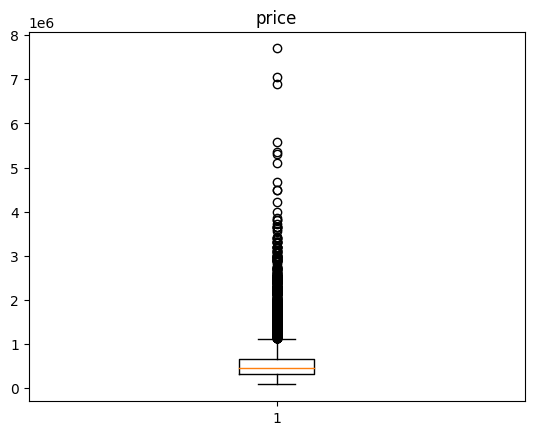

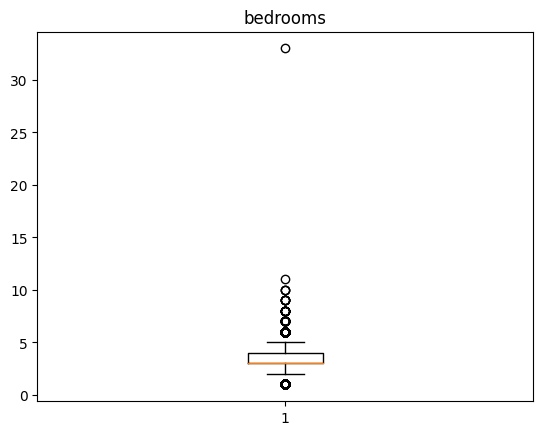

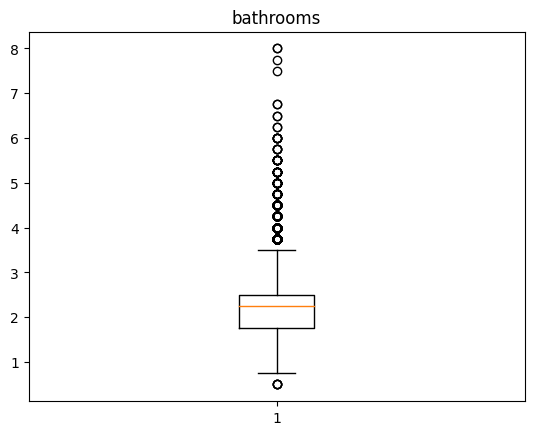

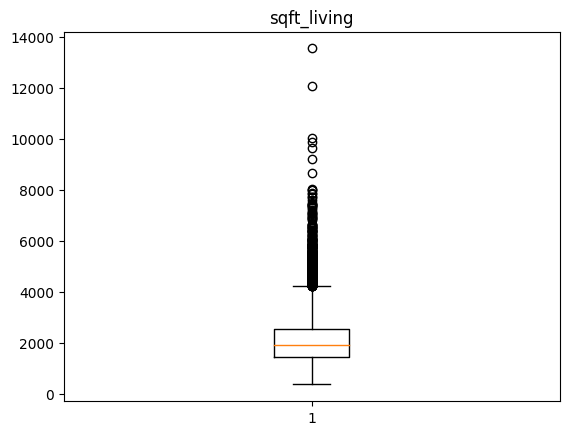

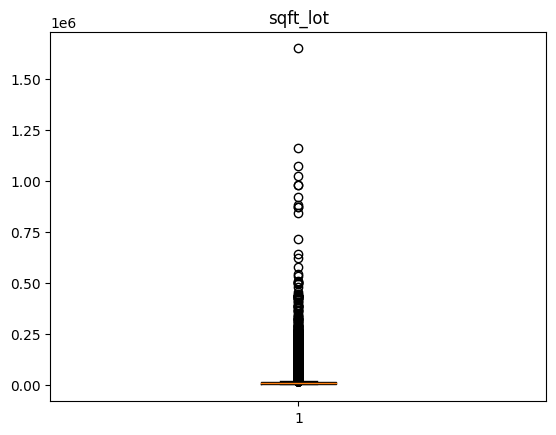

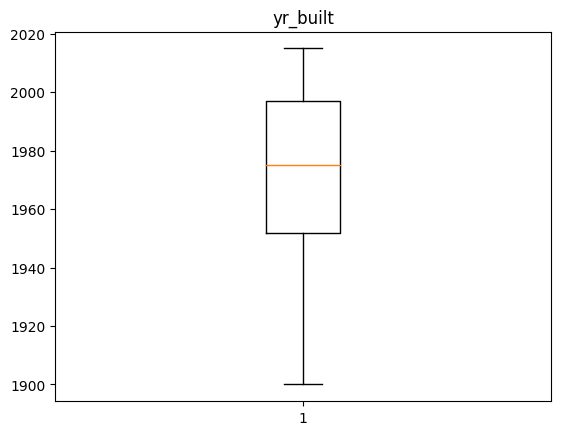

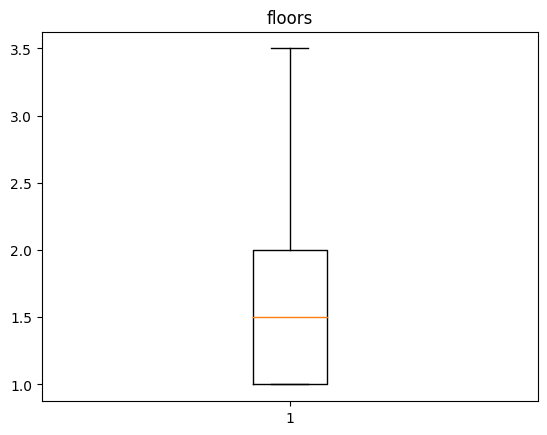

In [15]:
# Selecting the numerical columns in the dataset
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'floors']

# Calculating z-scores for the numerical columns
z_scores = (data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std()

# defining a threshold for identifying outliers
threshold = 2

# Find the indices of outliers for each column
outlier_indices = (z_scores > threshold).any(axis=1)

# Extract the outlier rows from the dataset
outliers = data[outlier_indices]

# Plotting the outliers
for column in numeric_columns:
    plt.figure()
    plt.boxplot(data[column])
    plt.title(column)
    plt.show()


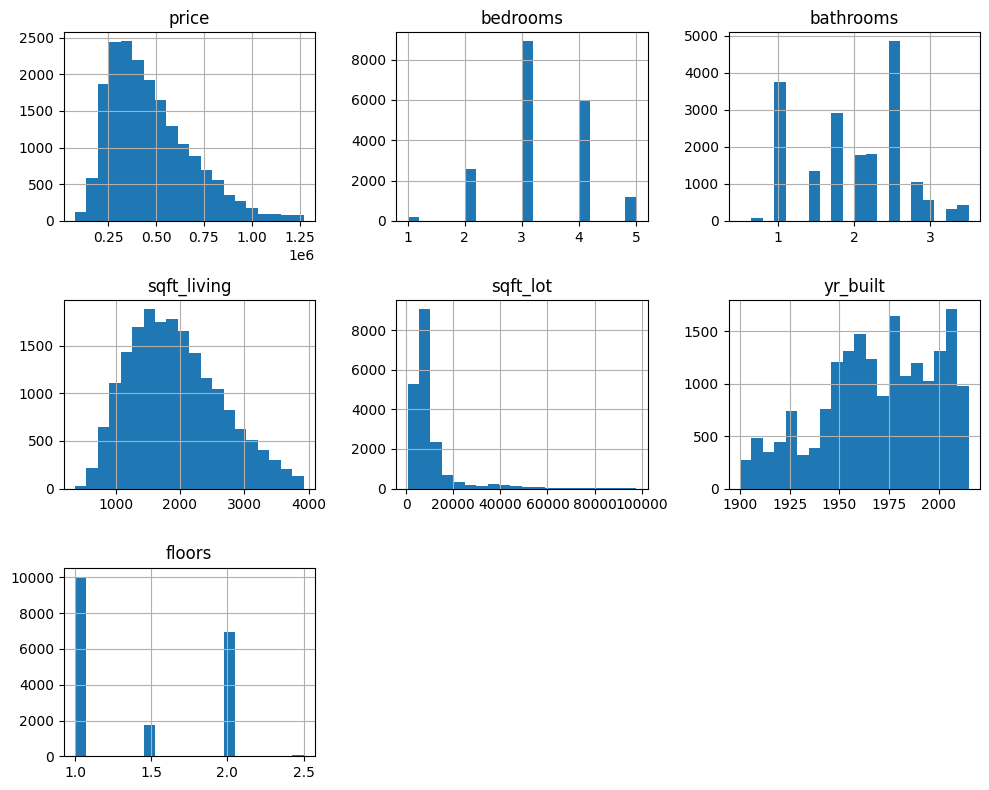

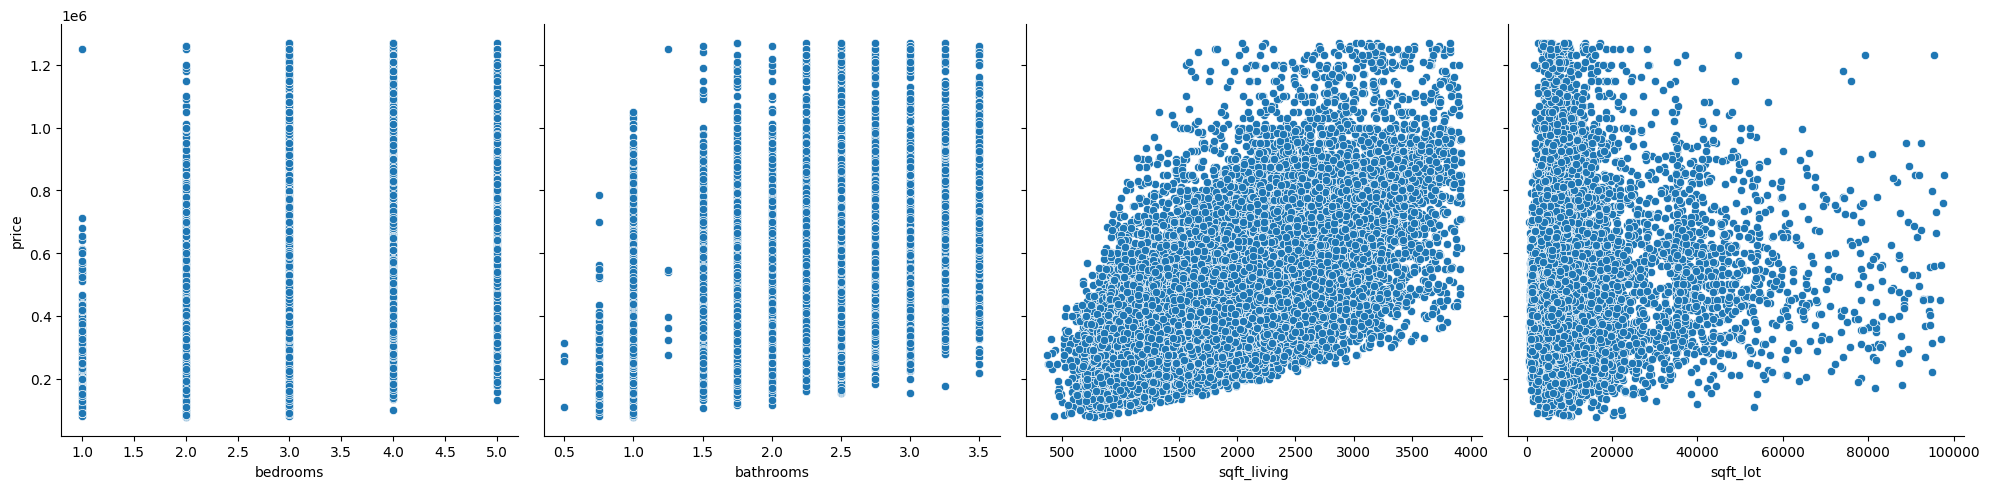

In [16]:
# Removing the outlier rows from the dataset
data_cleaned = data[~outlier_indices]

# Reset the index of the cleaned dataset
data_cleaned.reset_index(drop=True, inplace=True)

# Plot histograms of the cleaned dataset
data_cleaned[numeric_columns].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Plot scatterplots of price against other numeric columns
sns.pairplot(data_cleaned, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], y_vars='price', height=5)
plt.tight_layout()
plt.show()



### One-Hot encoding

It is technique used in to convert categorical variables into a binary vector representation that can be used regression modelling.

First, we check for categorical columns, then get the value counts and lastly perform encoding.

In [17]:
# checking for categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['waterfront', 'condition', 'grade'], dtype='object')

In [18]:
# exploring categorical variables,using value_counts() to get the count of each unique value in a column 
# using describe() to get summary statistics for categorical columns.
for column in categorical_columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

# Summary statistics for categorical columns
print(data[categorical_columns].describe())

Value counts for waterfront:
waterfront
NO     21274
YES      146
Name: count, dtype: int64

Value counts for condition:
condition
Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: count, dtype: int64

Value counts for grade:
grade
7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64

       waterfront condition      grade
count       21420     21420      21420
unique          2         5         11
top            NO   Average  7 Average
freq        21274     13900       8889


In [19]:
# one hot encoding to convert categoriacl values into binary'
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data_encoded.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_YES,condition_Fair,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1955,False,False,...,False,False,False,False,False,False,False,True,False,False
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,False,False,...,False,False,False,False,False,False,False,True,False,False
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,False,False,...,False,False,False,False,False,False,False,False,True,False


 ### Feature scaling and normalization using z-scores
This is done to numerical features to standardize their values and ensure they are on a similar scale and  helps prevent any bias or undue influence that may arise from differences in the magnitude of numerical features

In [20]:
 # Computing the z-scores for the numerical features only
data_numeric = data[numeric_columns]
data_numeric = (data_numeric - data_numeric.mean()) / data_numeric.std()

# Combining the encoded categorical features with the transformed numerical features
data_encoded = pd.concat([data_encoded, data_numeric], axis=1)

# Checking the updated dataset
print(data_encoded.head())


           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors   
0  7129300520  221900.0         3       1.00         1180      5650     1.0  \
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   yr_built  waterfront_YES  condition_Fair  ...  grade_7 Average   
0      1955           False           False  ...             True  \
1      1951           False           False  ...             True   
2      1933           False           False  ...            False   
3      1965           False           False  ...             True   
4      1987           False           False  ...            False   

   grade_8 Good  grade_9 Better     price  bedrooms  bathrooms  sqft_living   
0         False           False

### Correlation Analysis

Correlation analysis is a statistical technique used to measure the strength and direction of the linear relationship between two or more variables. It helps identify the degree of association between variables and provides insights into their interdependencies.



Correlation Matrix:
                price  bedrooms  bathrooms  sqft_living  sqft_lot  yr_built   
price        1.000000  0.286856   0.420169     0.603984  0.086361  0.019068  \
bedrooms     0.286856  1.000000   0.498039     0.605435  0.085479  0.213829   
bathrooms    0.420169  0.498039   1.000000     0.713880  0.054747  0.562587   
sqft_living  0.603984  0.605435   0.713880     1.000000  0.211969  0.379212   
sqft_lot     0.086361  0.085479   0.054747     0.211969  1.000000  0.059982   
yr_built     0.019068  0.213829   0.562587     0.379212  0.059982  1.000000   
floors       0.277161  0.234133   0.536191     0.430597 -0.063414  0.480721   

               floors  
price        0.277161  
bedrooms     0.234133  
bathrooms    0.536191  
sqft_living  0.430597  
sqft_lot    -0.063414  
yr_built     0.480721  
floors       1.000000  


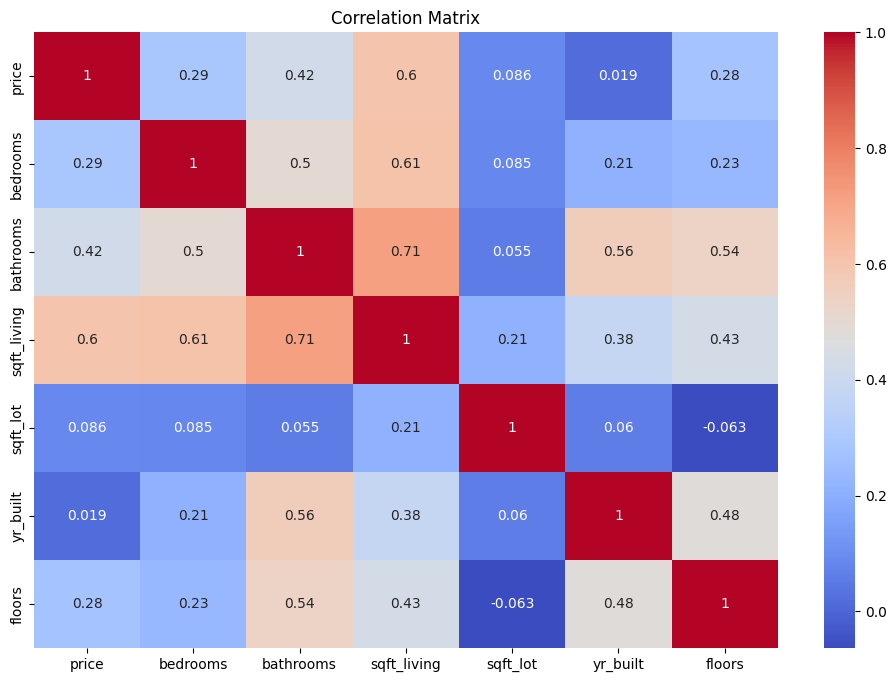

In [21]:
# Correlation analysis
correlation_matrix = data_cleaned[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Regression modelling

- To perform regression modeling, we will split the dataset into features (X) and target variable (y), and then split them into training and testing sets. We will use the LinearRegression model from scikit-learn library to build the regression model.
- We are using regression since it provides  more rigorous and quantitative approach to understanding the relationships between variables in the data.
- Regression coefficients provide numerical values that represent the magnitude and direction of the relationship between variables. This allows for precise interpretation and comparison of the impact of different variables on the target variable.
- Regression models can account for the effects of other variables and control for confounding factors. By including multiple variables in the model, we can assess the unique contribution of each variable while controlling for the influence of other factors.
- Statistical analyses allow for model evaluation using performance metrics like R-squared, MSE, RMSE These metrics provide objective measures of model fit and predictive accuracy, enabling comparison between different models to identify the most effective one.


### Baseline model

We going to create a simple regression model without using any modifications to establish a baseline performance metric that other models can compare aganaist

In [30]:
# Selecting the target variable and features
target = 'price'
features = ['sqft_living']

# Splitting the dataset into training and test sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the baseline linear regression model
baseline_model = LinearRegression()

# Fitting the model on the training data
baseline_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = baseline_model.predict(X_test)

# Calculating the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the MSE, R-squared
print("\nBaseline Regression Model Evaluation:")
print(f"R-squared: {r2:.2f}")
print('Baseline Model MSE:', mse)


Baseline Regression Model Evaluation:
R-squared: 0.49
Baseline Model MSE: 61857052064.47349


The mean squared error (MSE) is a measure of the average squared difference between the predicted sale prices and the actual sale prices in the dataset. The MSE in this case is 61857052064.47349, which indicates the average squared difference between the predicted and actual sale prices is approximately $61857052064.47349

The R-squared value of 0.49 indicates that approximately 49% of the variability in the sale prices can be explained by the independent variables sqft_living in the model. This means that the model accounts for 49% of the variance in the target variable, with the remaining 51% being attributed to other factors not included in the model.

### Second Model using Muliple linear regression 

We going to use three variables and see the difference between the basic linear regression and multiple linear regression.

In [31]:

# Creating the feature matrix X and the target variable y
X = data[['bedrooms', 'bathrooms', 'sqft_living']]
y = data['price']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the coefficients
coefficients = model.coef_
for feature, coefficient in zip(X.columns, coefficients):
    print(f'{feature}: {coefficient}')

# Print the mean squared error and R-squared score
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


bedrooms: -57992.71356428832
bathrooms: 6932.4466120303805
sqft_living: 311.56767726062844
Mean Squared Error: 59825974041.53878
R-squared: 0.5059640537488438


The coefficient for the bathrooms is 6932.45, suggesting that, on average, each additional bathroom is associated with an increase in the predicted sale price by $6,932.45, holding all other variables constant.

The coefficient for the sqft_living variable is 311.57, indicating that, for each additional square foot of living area, the predicted sale price increases by $311.57, assuming other variables remain constant.

The MSE in this case is 59825974041.54, which indicates the average squared difference between the predicted and actual sale prices is approximately $59,825,974,041.54.

The R-squared value of 0.5059 indicates that approximately 50.59% This means that the model accounts for 50.59% of the variance in the target variable, with the remaining 49.41% being attributed to other factors not included in the mode

### Third Model using polynomial Transformation

This model is introduced to build on the baseline model, it will incorporate additional features such as polynomial transformation to capture non linear relationships to improve the performance of the model.

In [37]:
# selecting features and splitting data into train and test
X = data_encoded.drop(['price'], axis=1)
y = data_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating new feature using polynomial transformation
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)

# Creating a new model using the selected features
model_two = LinearRegression()
model_two.fit(X_poly_train, y_train)

# Transforming  the test features
X_poly_test = poly.transform(X_test)

# Making predictions on the test data
y_pred = model_two.predict(X_poly_test)

# Calculating the mean squared error (MSE) and Rsquared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#printing coefficients
coefficients = model.coef_
for feature, coefficient in zip(X.columns, coefficients):
    print(f'{feature}: {coefficient}')

# Print the MSE
print("\nModel2 Regression Model Evaluation:")
print(f"R-squared: {r2:.2f}")
print('Model2 MSE:', mse)


id: -57992.71356428832
bedrooms: 6932.4466120303805
bathrooms: 311.56767726062844

Model2 Regression Model Evaluation:
R-squared: 0.64
Model2 MSE: 22072786830.44224


The improvements in R^2 indicate that the new model explains a larger portion of the variance in the target variable compared to the other models. This means that the new model provides a better fit to the data and has the potential to make more accurate predictions. The reduction in MSE implies that the new model has smaller prediction errors, which can be valuable for stakeholders in terms of making informed decisions or pricing properties more accurately.

Based on the evaluation results, we observe that the last model with Polynomial Regression outperforms the other models in terms of lower MSE and higher R-squared.It provides valuable insights and implications for the stakeholder, who is a real estate agency aiming to assist homeowners in making informed decisions about home renovations to increase the estimated value of their homes. This suggests that the inclusion of polynomial terms improves the model's ability to capture non-linear relationships in the data..

## Regression Results

We identified that square footage of living room, bedrooms and bathrooms have the strongest relationship with price.For every unit increase in sqft_living, bathrooms and bedrooms the predicted sale price increases by a certain coefficient value. By identifying the strong relationships between these features and sale prices, stakeholders can gain valuable insights into the factors that significantly influence property values.

Buyers and sellers understanding the impact of square footage of living room, bedrooms, and bathrooms on sale prices can help them in making informed decisions. Buyers can consider the trade-off between the size of the living area and the price they are willing to pay. Sellers, on the other hand, can leverage this information to determine an appropriate listing price for their property based on its size and bathroom count.

Developers can focus on constructing properties with larger living areas, more bathrooms and bedrooms to cater to the demand, as they are likely to command higher sale prices. Investors can consider these features when evaluating potential investment properties, as they play a significant role in determining the property's value appreciation over time.

Buyers consider the impact of living area and bathroom count on the sale price when searching for properties. Sellers take into account the size of the living area and the number of bathrooms when pricing the property. Developers on the other hand ocus on constructing properties with larger living areas and multiple bathrooms to appeal to buyers looking for spacious and well-equipped homes. Investors like to onsider the influence of living area and bathroom count when evaluating investment opportunities. Properties with larger living areas and more bathrooms may have higher potential for value appreciation.


## Data Visualization

Here we will be using Exploratory Data Analysis to allow shareholders understand the value and success of how different features affect prices.

#### Histogram

The histogram plot will provide a visual representation of the distribution of house prices in the dataset

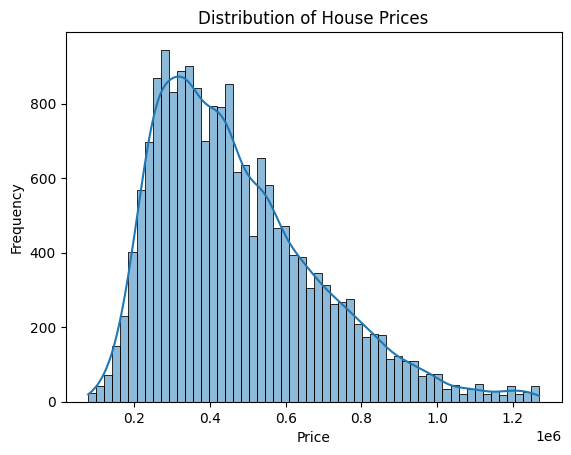

In [33]:
# Exploratory Data Analysis (EDA)
# Visualizing the distribution of the target variable (price)
sns.histplot(data=data_cleaned, x='price', kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

This plot allows stakeholders to understand the range and frequency of different price levels. The justification for this plot is that it helps stakeholders gain insights into the overall distribution of house prices, which can be useful for understanding the market dynamics and identifying any potential outliers or skewed distributions. By visualizing the distribution, stakeholders can make informed decisions about pricing strategies and identify areas of focus for their analysis.

#### Box plot

We will be using a measure of central tendecy (median) to give shareholders a better understanding of how the house condition affects the sales price.

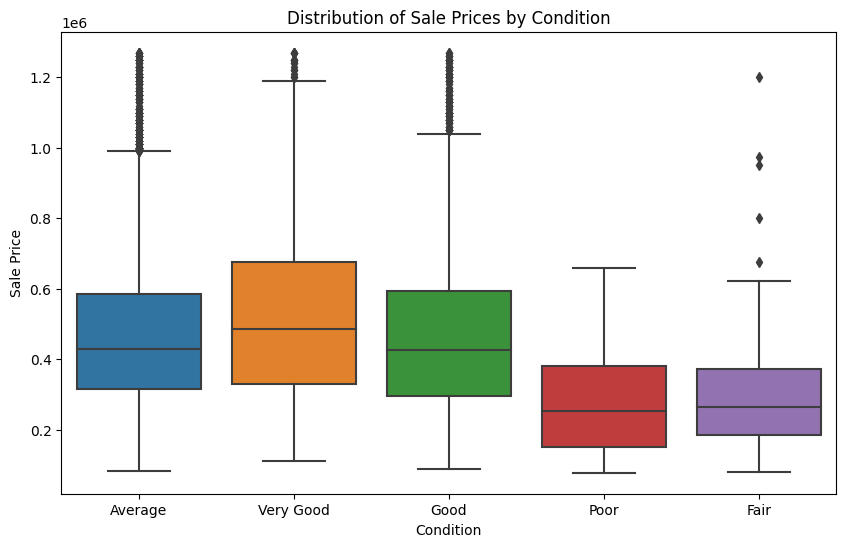

condition
Average      450900.0
Fair         277000.0
Good         440000.0
Poor         262500.0
Very Good    525000.0
Name: price, dtype: float64


In [34]:
# Creating a box plot of condition and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=data_cleaned)

# Adding labels and title
plt.xlabel('Condition')
plt.ylabel('Sale Price')
plt.title('Distribution of Sale Prices by Condition')

# Adding median to price
medians = data.groupby('condition')['price'].median()
    
plt.show()
print(medians)

Condition of the house influences the house price. Properties with very good condition have the highest median sale price  while those with poor condition having the least sale price.

#### Line Plot

Using line plot to demonstrate trends of sales as the years go by to enable us see the trendsin properties over time.

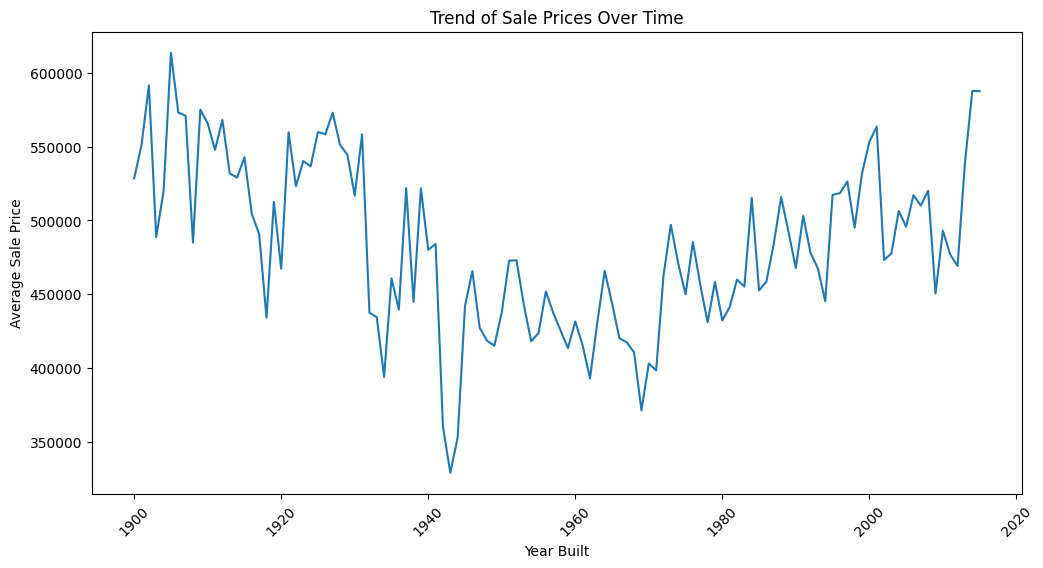

In [35]:

# Calculating the average sale price for each year
avg_price_by_year = data_cleaned.groupby('yr_built')['price'].mean()

# Creating a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values)

# Add labels and title
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.title('Trend of Sale Prices Over Time')

# Adjust x-axis ticks and labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


The line plot illustrates the trend of sale prices over time, specifically how prices have evolved as the years go by.
We can see a clear upward trend from 1960, indicating that sale prices have generally increased over the years. This suggests that properties built in more recent years tend to have higher sale prices compared to older properties.

The increasing trend of sale prices over time can be attributed to several factors such as inflation and the general rise in the cost of living contribute to the overall increase in property prices and a higher demand for newer and more modern properties, which drives up their price